In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import scipy

from anndata_plot.pl import heatmap_triangle

from typing import Union, Literal, Optional

Let's simulate some data and display it as triangular heatmap:

In [3]:
N = 10
names = ["a", "b", "c", "d", "e", "f", "g", "i", "h", "k"]
X = np.random.normal(size=(N, N))
X = pd.DataFrame(X, index=names, columns=names)

In [4]:
X

,a,b,c,d,e,f,g,i,h,k
a,0.787162,0.021571,0.685281,0.065072,0.198667,-0.703912,1.816671,0.107251,-0.217546,0.632625
b,0.756672,-0.649788,-0.005833,-0.757035,-0.889004,0.091159,-1.576321,-0.186957,0.453787,0.584943
c,1.432893,1.426802,-0.488008,1.174848,-0.335347,-1.882018,-0.231280,2.528613,0.126597,-0.876188
d,-1.062865,-1.842285,1.378473,0.174330,-1.222331,-1.143370,0.102501,-0.358087,1.239654,-0.639304
e,-0.787745,-0.683633,-0.076422,-1.571677,0.139861,-0.435478,1.780083,-0.726927,-0.895388,-2.331996
f,1.353155,-1.443195,0.518211,-0.492464,1.988812,-1.728696,1.907205,0.202575,0.088110,1.101590
g,0.018535,0.073646,-1.541082,-0.304320,-0.421237,0.131637,-0.193189,-0.479091,1.516507,1.177065
i,-0.955635,0.544406,0.350045,-0.561028,0.759998,0.156931,1.160625,0.437028,-1.554155,-0.549900
h,0.598876,-0.558970,-1.341143,-0.132238,0.445032,-0.063816,-0.373852,0.207822,-0.625209,1.634587
k,2.635872,-0.515874,2.556876,-0.535044,1.240394,1.680156,0.979536,0.719624,-0.978227,-1.523083


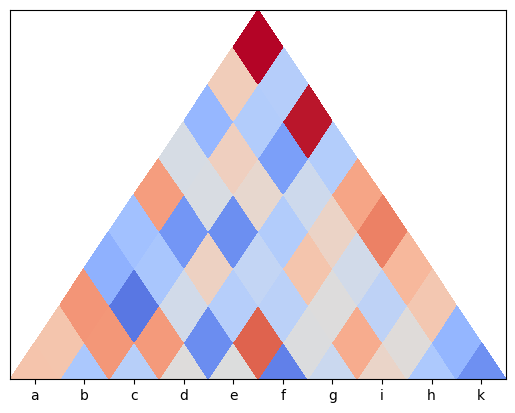

In [5]:
heatmap_triangle(X)

Use `cmap` argument to control the colormap:

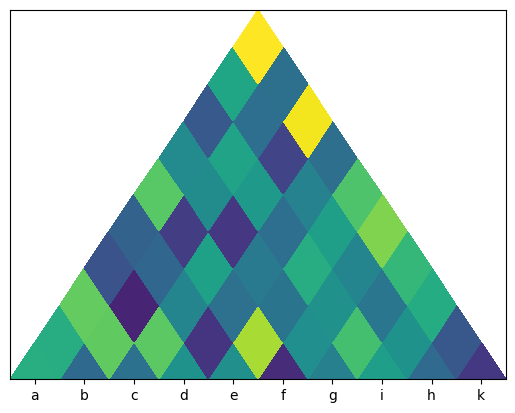

In [6]:
heatmap_triangle(X, cmap="viridis")

Use `direction` parameter to display the heatmap as desired:

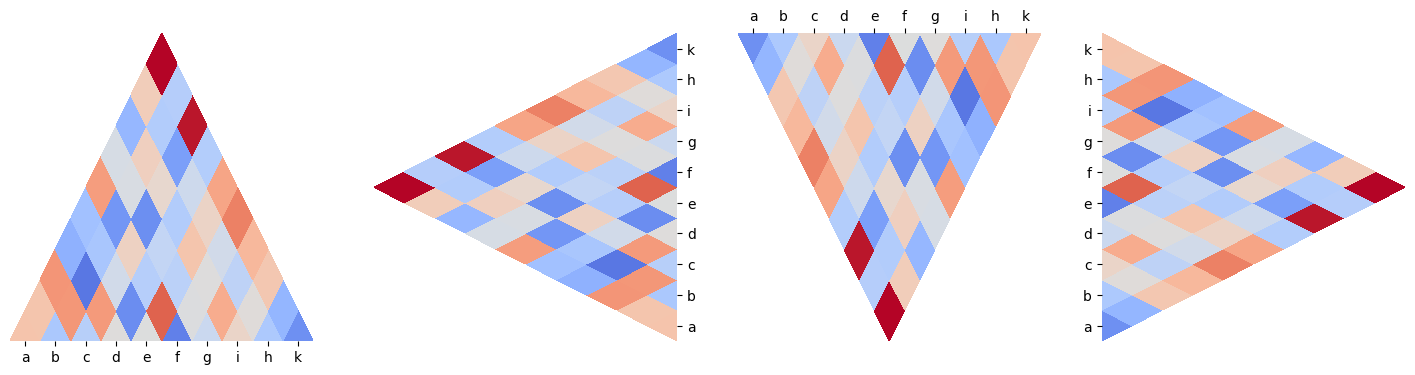

In [7]:
plt.figure(figsize=(18, 4))
ax = plt.subplot(1, 4, 1, frameon=False)
heatmap_triangle(X, direction = "up", ax=ax)

ax = plt.subplot(1, 4, 2, frameon=False)
heatmap_triangle(X, direction = "left", ax=ax)

ax = plt.subplot(1, 4, 3, frameon=False)
heatmap_triangle(X, direction = "down", ax=ax)

ax = plt.subplot(1, 4, 4, frameon=False)
heatmap_triangle(X, direction = "right", ax=ax)

Observation names can be provided manually. If they are too long, use `ticks_rotation` parameter to prevent overlap:

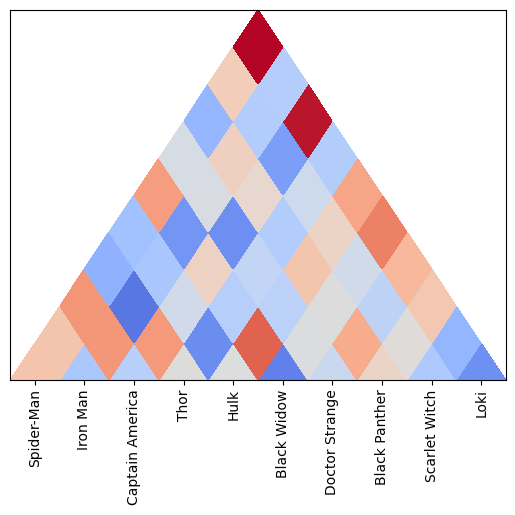

In [8]:
heatmap_triangle(
    X,
    names=[
        "Spider-Man",
        "Iron Man",
        "Captain America",
        "Thor",
        "Hulk",
        "Black Widow",
        "Doctor Strange",
        "Black Panther",
        "Scarlet Witch",
        "Loki"
    ],
    ticks_rotation=90
)

Use `show_cbar` parameter to display a colorbar and `cbar_label` to set its title. Any additional colorbar paramerers can be set as keywords arguments. For example, we change `pad` on the second plot and the default orientation on the third one:

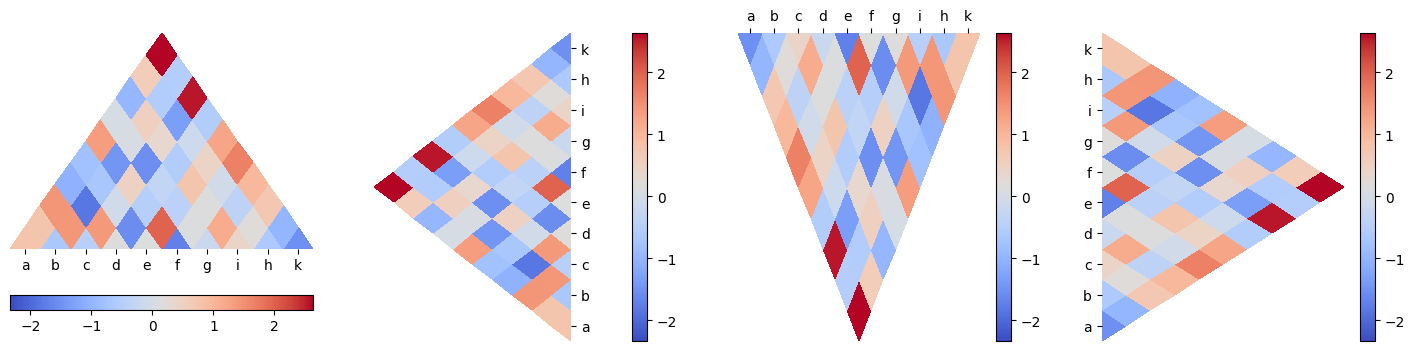

In [9]:
plt.figure(figsize=(18, 4))
ax = plt.subplot(1, 4, 1, frameon=False)
heatmap_triangle(X, direction = "up", ax=ax, show_cbar=True)

ax = plt.subplot(1, 4, 2, frameon=False)
heatmap_triangle(X, direction = "left", ax=ax, show_cbar=True, pad=0.2)

ax = plt.subplot(1, 4, 3, frameon=False)
heatmap_triangle(X, direction = "down", ax=ax, show_cbar=True, orientation="vertical")

ax = plt.subplot(1, 4, 4, frameon=False)
heatmap_triangle(X, direction = "right", ax=ax, show_cbar=True)

Now let's take a look at some real data example. Let's load processed PBMC data from the `scanpy` tutorial and visualise distance matrix between cell types:

In [10]:
adata = sc.datasets.pbmc3k_processed()
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [11]:
pc_df = pd.DataFrame(adata.obsm["X_pca"], index=adata.obs_names)
pc_df["cell_type"] = adata.obs["louvain"]
pseudobulks = pc_df.groupby("cell_type").mean()
pseudobulks

/var/folders/p9/74j47tdn36n6s2vcv_5079q0s4wk4h/T/ipykernel_20919/1886454965.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pseudobulks = pc_df.groupby("cell_type").mean()


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
cell_type,,,,,,,,,,,,,,,,,,,,,
CD4 T cells,3.301767,0.872418,-0.251317,2.629384,-0.152236,0.443775,-0.325066,0.222767,0.046547,0.010826,...,0.016875,-0.006307,0.026187,0.007999,-0.023396,0.012456,-0.009867,0.012205,0.029735,-0.010883
CD14+ Monocytes,-10.044544,-0.564227,0.916160,1.110005,1.278510,-0.200253,-0.397694,-0.324510,-0.329247,0.057489,...,-0.007229,-0.015916,-0.059458,0.005660,-0.003676,-0.005229,0.045876,-0.017712,-0.018096,-0.011860
B cells,1.350141,6.886784,1.179472,-6.499475,0.014204,-0.072809,-0.130677,-0.329974,-0.065142,0.126122,...,-0.027195,-0.036087,-0.010265,-0.018652,-0.031880,0.001331,-0.016129,-0.043084,-0.015619,-0.026776
CD8 T cells,4.042235,-3.691889,-0.035954,-0.249648,0.262591,-2.861241,1.578317,-0.353448,-0.381242,-0.174982,...,-0.039747,0.032701,-0.173496,-0.061518,0.106657,-0.040731,0.022236,-0.031797,-0.088504,0.050690
NK cells,3.245108,-11.984359,0.778059,-6.010164,0.590725,2.580980,-0.971989,-0.459407,0.361203,-0.142102,...,-0.020956,0.083179,0.159196,0.100399,-0.043385,-0.003692,-0.018077,0.059846,0.058634,0.017964
FCGR3A+ Monocytes,-6.415722,-0.901122,0.323747,-0.768606,-5.778090,0.743698,1.115408,-0.028880,0.619199,0.267555,...,0.072927,0.003577,0.109824,0.016457,-0.019979,-0.053196,-0.004891,0.114586,0.022952,-0.045528
Dendritic cells,-3.071079,1.508037,0.049483,-3.421246,6.502693,0.225830,2.311843,5.310691,2.367127,-1.286671,...,0.074130,0.087077,0.506240,-0.038288,0.370792,0.265561,-0.274939,-0.089753,-0.105293,0.450101
Megakaryocytes,-7.912893,0.606808,-47.632107,-4.777730,0.518567,0.007627,0.369976,0.269696,0.763427,0.102556,...,-0.295238,0.019671,-0.186908,-0.170808,0.112538,-0.040131,0.096505,-0.250788,-0.039885,-0.087256


In [12]:
cell_type_distances = scipy.spatial.distance.pdist(pseudobulks, metric="cosine")
cell_type_distances = scipy.spatial.distance.squareform(cell_type_distances)
cell_type_distances

array([[0.        , 1.69671084, 1.1659188 , 0.73423144, 1.23412507,
        1.59928421, 1.3779477 , 1.12427533],
       [1.69671084, 0.        , 1.23531997, 1.57941212, 1.21462456,
        0.38440575, 0.73420467, 0.93876208],
       [1.1659188 , 1.23531997, 0.        , 1.29439198, 1.27960127,
        1.11534471, 0.75964104, 1.06724174],
       [0.73423144, 1.57941212, 1.29439198, 0.        , 0.45179666,
        1.42910187, 1.20753707, 1.09895842],
       [1.23412507, 1.21462456, 1.27960127, 0.45179666, 0.        ,
        1.06014093, 1.0448072 , 1.06001856],
       [1.59928421, 0.38440575, 1.11534471, 1.42910187, 1.06014093,
        0.        , 1.12153679, 0.91605948],
       [1.3779477 , 0.73420467, 0.75964104, 1.20753707, 1.0448072 ,
        1.12153679, 0.        , 0.92127013],
       [1.12427533, 0.93876208, 1.06724174, 1.09895842, 1.06001856,
        0.91605948, 0.92127013, 0.        ]])

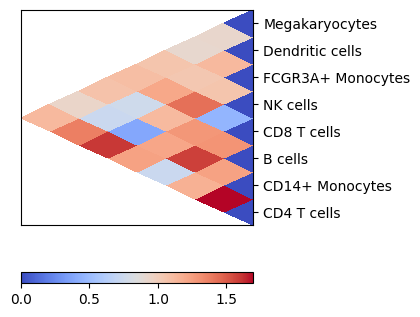

In [13]:
plt.figure(figsize=(3, 4), frameon=False)
heatmap_triangle(cell_type_distances, direction="left", names=pseudobulks.index, show_cbar=True, orientation="horizontal")

In [14]:
sc.tl.dendrogram(adata, groupby="louvain")
dendrogram = adata.uns["dendrogram_louvain"]

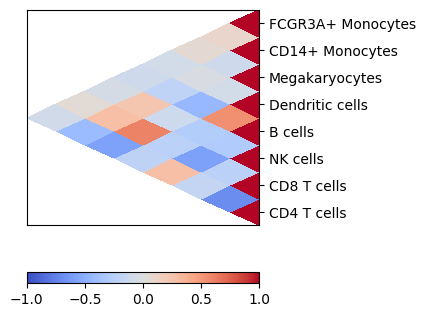

In [15]:
fig = plt.figure(figsize=(3, 4), frameon=False)
heatmap_triangle(dendrogram["correlation_matrix"], direction="left", names=dendrogram["categories_ordered"], show_cbar=True, orientation="horizontal", vmin=-1, vmax=1)

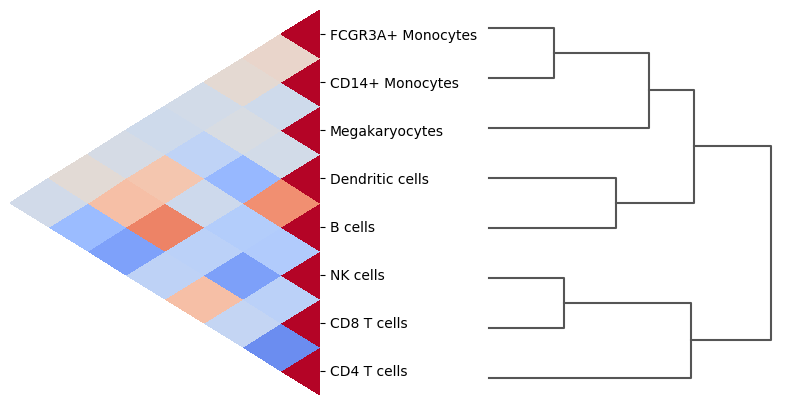

<Axes: >

In [16]:
plt.figure(figsize=(10, 5), frameon=False).subplots_adjust(wspace=0.5)
ax = plt.subplot(1, 2, 1, frameon=False)
heatmap_triangle(dendrogram["correlation_matrix"], direction="left", names=dendrogram["categories_ordered"], orientation="horizontal", vmin=-1, vmax=1, ax=ax)
ax = plt.subplot(1, 2, 2, frameon=False)
sc.pl.dendrogram(adata, groupby="louvain", orientation="right", ax=ax, remove_labels=True)